## GUIA 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import multivariate_normal

## Ejercicio 1


![image.png](enunciados/ej1.png)

Comenzamos definiendo las variables y los datos que nos da el enunciado

Y : "Bit emitido"

X : "Bit recibido"

P(Y = 1) = 3/4 : Probabilidad de que el bit emitido sea 1

P(Y = 0) = 1/4 : Probabilidad de que el bit emitido sea 0

X|Y=0 ~ N(0,4) : Distribucion del bit recibido, dado que se emitio un 0

X|Y=1 ~ N(0,1) : Distribucion del bit recibido, dado que se emitio un 0

a) 

$p_X(x) = P(Y = 0) \cdot p_{X|Y=0}(x) + P(Y = 1) \cdot p_{X|Y=1}(x)$


$p_{X|Y=0}(x) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$p_{X|Y=1}(x) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces queda que

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$


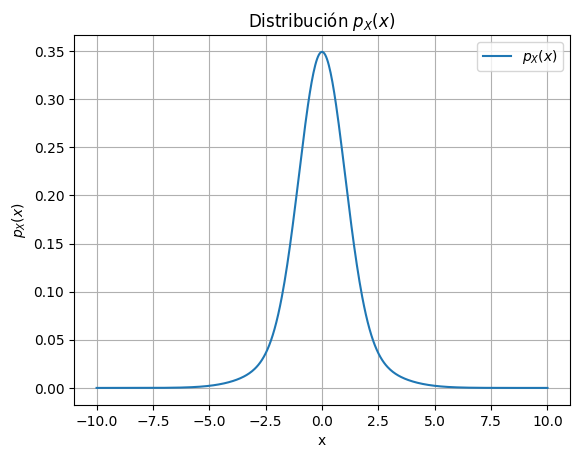

In [13]:
# Rango de X
x = np.linspace(-10, 10, 500)

p_Y1 = 0.75
p_Y0 = 0.25

# Normales
pX_dado_Y0 = p_Y0 * norm.pdf(x, 0, np.sqrt(4))
pX_dado_Y1 = p_Y1 * norm.pdf(x, 0, np.sqrt(1))

# Las sumo
p_X = pX_dado_Y0 + pX_dado_Y1

# Grafico
plt.plot(x, p_X, label=r'$p_X(x)$')
plt.title(r'Distribución $p_X(x)$')
plt.xlabel('x')
plt.ylabel(r'$p_X(x)$')
plt.legend()
plt.grid(True)

b) Para calcular $p_{Y|X}(1|x)$ podemos usar el Teorema de Bayes

$p_{Y|X}(1|x) = \frac{p_{X|Y}(x|1) \cdot p_Y(1)}{p_X(x)}$

Tenemos que

$p_{X|Y}(x|1) = \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

$p_Y(1) = 0.75$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Entonces reemplazando queda:

$p_{Y|X}(1|x) = \frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} $




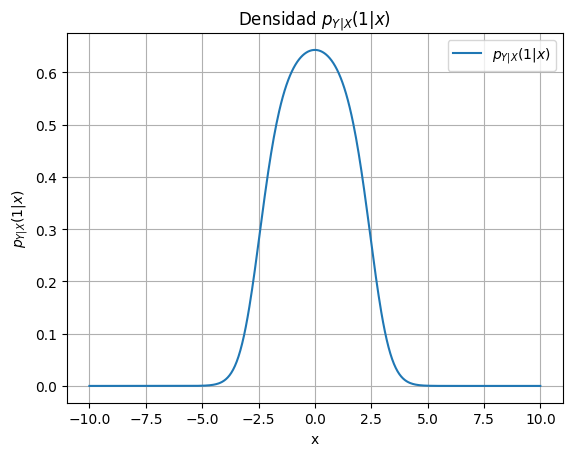

In [14]:
# Defino
pY_dado_X1 = (pX_dado_Y1 * p_Y1) / p_X

# Graficar
plt.plot(x, pY_dado_X1, label=r'$p_{Y|X}(1|x)$')
plt.title(r'Densidad $p_{Y|X}(1|x)$')
plt.xlabel('x')
plt.ylabel(r'$p_{Y|X}(1|x)$')
plt.legend()
plt.grid(True)


c) Primero calculamos $p_{Y|X}(0|x)$ de la misma forma que el inciso anterior

$p_{Y|X}(0|x) = \frac{p_{X|Y}(x|0) \cdot p_Y(0)}{p_X(x)}$

Con:

$p_{X|Y}(x|0) = \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) $

$p_Y(0) = 0.25$

$p_X(x) = 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})$

Reemplazando:

$p_{Y|X}(0|x) = \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$


Ahora:

$P_{Y|X}(1|x) > P_{Y|X}(0|x)$

$\frac{0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})} > \frac{0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})}{0.25 \cdot \frac{1}{ 2 \sqrt {2 \pi}} \cdot exp(-\frac{x^2}{8}) + 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})}$

$ 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) > 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})$

$0.75 \cdot  exp(-\frac{x^2}{2}) > 0.125 \cdot exp(-\frac{x^2}{8}) $

$6 \cdot exp(-\frac{3x^2}{8}) > 1 $

$|x| < \sqrt{\frac{8 \cdot Ln(6)}{3}} $

$|x| < 2.1858694$



d) El Error Bayesiano se calcula como $1 - E[max_{y} P_{Y|X}(y|X)]$

Para desarrollar el termino de la Esperanza se deben separar las integrales en distintos intervalos ya que el valor maximo de las probabilidades condicionales varia (estos intervalos se calcularon en el ejercicio anterior).

Una de las integrales ira desde $-\infty$ hasta $-x_0 = 2.18587$, otra ira desde $-x_0$ hasta $x_0$, y la tercera ira desde $x_0$ hasta $\infty$

$E[max_{y} P_{Y|X}(y|X)] = \int_{-\infty}^{x_0} P(Y=0|X) \cdot P(X=x) dx + \int_{-x_0}^{x_0} P(Y=1|X) \cdot P(X=x) dx + \int_{x_0}^{\infty} P(Y=0|X) \cdot P(X=x))$

$E[max_{y} P_{Y|X}(y|X)] = \int_{-\infty}^{x_0} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) dx + \int_{-x_0}^{x_0} 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) dx + \int_{x_0}^{\infty} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx$

Siendo $\Phi(z)$ la funcion de distribucion de una normal estandar N(0,1)

$\Phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2 \pi}} exp (-\frac{t^2}{2})dt$

Podemos normalizar de la siguiente manera

- Para X|Y=0 usamos $Z = \frac{X}{2}$ 
- Para X|Y=1 podemos usar directamente $\Phi(z)$

Entonces:

- $\int_{-\infty}^{x_0} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8}) dx = 0.25 \Phi(-\frac{x_0}{2})$

- $\int_{-x_0}^{x_0} 0.75 \cdot \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) dx = 0.75 \cdot (\int_{-\infty}^{x_0} \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2}) - \int_{-\infty}^{-x_0} \frac{1}{ \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{2})) = 0.75 \cdot (\Phi(x_0) - \Phi(-x_0)) = 0.75 \cdot (2\Phi(x_0) -1)$

- $\int_{x_0}^{\infty} 0.25 \cdot \frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx = 0.25 \cdot (1 - \int_{-\infty}^{x_0}\frac{1}{ 2 \sqrt{2 \pi}} \cdot exp(-\frac{x^2}{8})dx ) = 0.25 \cdot (1 - \Phi(\frac{x_0}{2}))$


Reemplazando en la formula del error bayesiano:

$Eb = 1 - (0.25 \Phi(-\frac{x_0}{2}) + 0.75 \cdot (2\Phi(x_0) -1) +  0.25 \cdot (1 - \Phi(\frac{x_0}{2})))$

$Eb = \frac{5}{4} - \frac{3}{2} \Phi(x_0) + \frac{1}{2} \Phi(\frac{x_0}{2}) $

### Ejercicio 2

![image.png](enunciados/ej2.png)

Definimos las variables que tenemos

$p \sim Ber(\frac{1}{2})$

$q \sim Ber(\frac{1}{3})$

La Divergencia de Kullback Leibler se calcula como

$KL(p||q) = E_{p_x}[ln(\frac{p_X(X)}{q_X(X)})]$


En este caso:

$KL(p||q) = \sum _x Ln(\frac{p_X(X)}{q_X(X)}) \cdot p_X(x) $

$KL(p||q) = p_X(0) \cdot ln(\frac{p_X(0)}{q_X(0)}) + p_X(1) \cdot ln(\frac{p_X(1)}{q_X(1)}) $

$KL(p||q) = p  \cdot ln(\frac{p}{q}) + (1-p) \cdot ln(\frac{1-p}{1-q}) $

Reemplazando por los valores de p=1/2 y q=1/3

$KL(p||q) = 0.1438$


Para la Divergencia de Kullback Leibler en sentido inverso $KL(q||p)$ se tiene

$KL(q||p) = E_{q_x}[ln(\frac{q_X(X)}{p_X(X)})] $

En este caso queda 

$KL(q||p) = q  \cdot ln(\frac{q}{p}) + (1-q) \cdot ln(\frac{1-q}{1-p})$

$KL(q||p) = 0.1308 $



### Ejercicio 3

![image.png](enunciados/ej3.png)

a) Comenzamos definiendo la funcion sigmoide como 


$\sigma(z) = \frac{1}{1 + e^{-z}} = p$

Pasamos el denominador multiplicando para el otro lado

$p \cdot (1 + e^{-z}) = 1 $

Distribuimos y despejamos la exponencial

$ e^{-z} = \frac{1 - p}{p}$

Aplicamos ln() a ambos lados

$z = - ln(\frac{1 - p}{p})$




b) y c) La derivada de la funcion sigmoide se calcula de la siguiente manera

$ \sigma'(z) = \frac{d}{dz} (\frac{1}{1 + e^{-z}}) = e^{-z} \cdot \frac{1}{(1 + e^{-z})^2}$


$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $

Entonces,

$\sigma'(z) = p \cdot (1 - p)$

Para los valores infimos y supremos, analizamos el dominio de $\sigma(z) \in (0,1)$

En el caso del minimo

Cuando p = 0, $\sigma'(z)$ = 0

Cuando p = 1, $\sigma'(z)$ = 0

Por otro lado, para el maximo, si distribuimos p, se obtiene que $\sigma'(z) = p - p^2$

Vemos que su maximo se alcanza cuando $p = \frac{1}{2}$

Reemplazamos el valor de $p = \frac{1}{2}$ en $\sigma'(z)$ y obtenemos su minimo valor $\frac{1}{4}$


Entonces, finalmente queda que:

- El valor mínimo de $\sigma'(z)$ es 0 y se alcanza cuando p = 0 o p = 1
- El valor máximo de $\sigma'(z)$ es 1/4 y se alcanza cuando p = 1/2


### Ejercicio 4

![image.png](enunciados/ej4.png)

In [71]:
# Cargamos los datos
data = np.loadtxt('recursos/parcialitos.txt')

#del data


a) La funcion costo de la Regresión Logística Binaria es

$l(X_i, Y_i) = Y_i \cdot \ln(\sigma(w^T \cdot X_i + b)) + (1-Y_i) \cdot \ln( 1 - \sigma(w^T \cdot X_i + b)) $

Siendo la funcion Sigmoide

$\sigma(z) = \frac{1}{1 + e^{-z}} $

Si evaluamos la funcion sigmoide de la siguiente manera $\sigma(w^T \cdot X_i + b)$ se obtiene

$\sigma(w^T \cdot X_i + b) = \frac{1}{1 + e^{-(w^T \cdot X_i + b)}}$

Reemplazando en la funcion de costo se obtiene

$l(X_i, Y_i) = Y_i \cdot  \ln (\frac{1}{1 + e^{-(w^T \cdot X_i + b)}}) +  (1-Y_i) \cdot \ln(1 - \frac{1}{1 + e^{-(w^T \cdot X_i + b)}})$

Operando con propiedades y simplificando se obtiene que

$l(X_i, Y_i) = -(w^T \cdot X_i + b) - \ln{(1 + e^{-(w^T \cdot X_i + b)})} + Y_i \cdot (w^T \cdot X_i + b ) $

$ l(X_i, Y_i) = - \ln{(1 + e^{-(w^T \cdot X_i + b)})} + (Y_i - 1) \cdot (w^T \cdot X_i + b) $





El modelo predice que un estudiante con notas 45 y 85 está Aprobado.


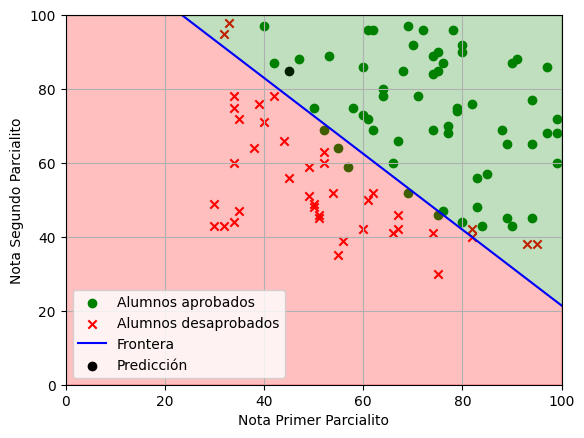

In [70]:
# b) y c)

resultados_parcialitos = data[:,0:2]
aprobados = data[:, 2]

reg_logistica = LogisticRegression()

reg_logistica.fit(resultados_parcialitos, aprobados)

alumnos_aprobados = np.where(aprobados==1)
alumnos_desaprobados = np.where(aprobados==0)

x = np.linspace(0, 100, 100)
w1, w2 = reg_logistica.coef_.T
b = reg_logistica.intercept_[0]
ordenada = -b/w2
pendiente = -w1/w2
frontera = pendiente * x + ordenada

# Prediccion
nota1 = 45
nota2 = 85
prediccion = reg_logistica.predict([[nota1, nota2]])
resultado_prediccion = 'Aprobado' if prediccion[0] == 1 else 'Desaprobado'


plt.scatter(resultados_parcialitos[alumnos_aprobados, 0], resultados_parcialitos[alumnos_aprobados, 1], color='green', marker='o', label='Alumnos aprobados')
plt.scatter(resultados_parcialitos[alumnos_desaprobados, 0], resultados_parcialitos[alumnos_desaprobados, 1], color='red', marker='x', label='Alumnos desaprobados')
plt.plot(x, frontera, label='Frontera', color='blue')
plt.scatter(nota1, nota2, color='black', label='Predicción')
plt.fill_between(x, frontera, 0 ,color='red', alpha=0.25)
plt.fill_between(x, frontera, 100, color='green', alpha=0.25)
plt.xlabel('Nota Primer Parcialito')
plt.ylabel('Nota Segundo Parcialito')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
plt.legend()

print(f'El modelo predice que un estudiante con notas 45 y 85 está {resultado_prediccion}.')


#del resultados_parcialitos, aprobados, reg_logistica, alumnos_aprobados, alumnos_desaprobados, x, w1, w2, b, ordenada, pendiente, frontera, nota1, nota2, prediccion, resultado_prediccion


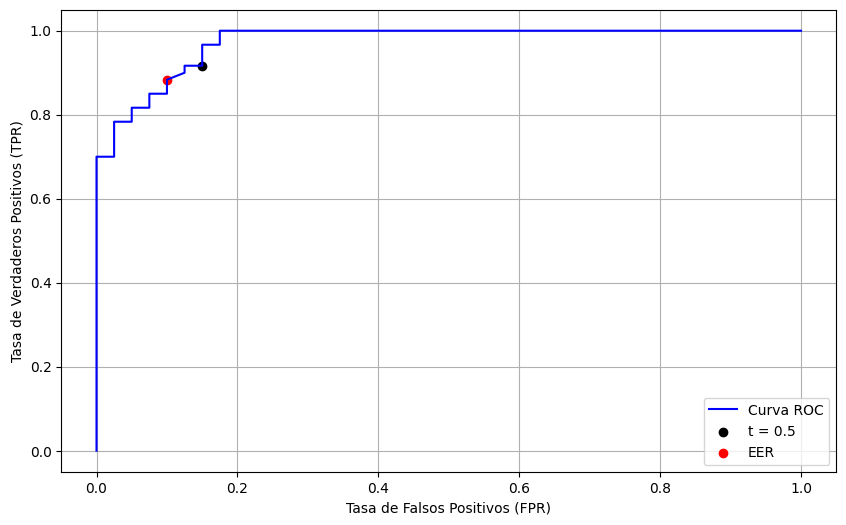

In [69]:
# d)

# Prob de las clases

y_prob = reg_logistica.predict_proba(resultados_parcialitos)[:, 1]

thresholds = np.arange(0.0, 1.1, 0.01)
tpr_list = []
fpr_list = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    tp = np.sum((y_pred == 1) & (aprobados == 1))
    fp = np.sum((y_pred == 1) & (aprobados == 0))
    tn = np.sum((y_pred == 0) & (aprobados == 0))
    fn = np.sum((y_pred == 0) & (aprobados == 1))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

fpr = np.array(fpr_list)
tpr = np.array(tpr_list)

# Calcular el EER
eer_index = np.argmin(np.abs(fpr - (1 - tpr)))




plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC')
plt.scatter(fpr[50], tpr[50], color='black', label = 't = 0.5')
plt.scatter(fpr[eer_index], tpr[eer_index], color='red', label = 'EER')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid()

#del y_prob, threshold, thresholds, fpr_list, tpr_list, y_pred, tp, fp, tn, fn, tpr, fpr, eer_index



### Ejercicio 5

![image.png](enunciados/ej5.png)

In [3]:
# Cargamos los datos
data = np.loadtxt('recursos/microchips.txt', delimiter=',')

#del data


En el caso del archivo provisto, se puede observar que se cuenta con un total de $n = 2$ features, que llamaremos $x_1$ y $x_2$. Como se nos pide realizar un polinomio de grado $d = 6$, necesitariamos encontrar el total de la cantidad de combinaciones de monomios posibles que pueden representar un polinomio de ese grado. Por ejemplo

$P = x_1^4 \cdot x_2^2$ es una posibilidad 

$P =  x_2^6$ tambien

Cada combinacion de $x_1$ y $x_2$ hasta el grado $d$ genera un nuevo termino en el modelo. Entonces, la cantidad de combinaciones posibles de lo terminos que podemos formar con $n$ caracteristicas, hasta el grado $d$ es

Cant. de parametros = $\frac{(n + d)!}{n! \cdot d!}$ = 28

In [12]:
# Separamos los datos del archivo

resultado_pruebas = data[:, 0:2]
resultado_inspeccion = data[:, 2]

# Cremos el polinomio de grado 6

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(resultado_pruebas)
# X_poly contiene todas las combinaciones polinómicas de las características 
# hasta el grado 6, que como vimos antes, son 28


#del resultado_pruebas, resultado_inspeccion, poly, X_poly


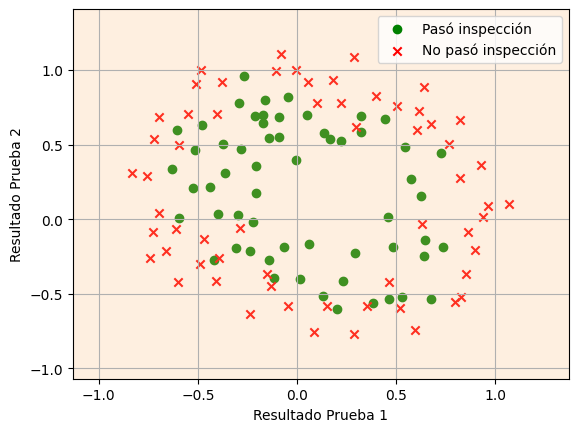

In [17]:
# c) 

# Definimos el parametro de regularizacion

lambda_regularizacion = 1000

reg_logistica_1000 = LogisticRegression(C = 1/lambda_regularizacion, penalty='l2', max_iter=10000)

# Entrenamos el nuevo modelo
reg_logistica_1000.fit(X_poly, resultado_inspeccion)


# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predecir sobre la malla de puntos con el nuevo modelo entrenado
prediccion_1000 = reg_logistica_1000.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
prediccion_1000 = prediccion_1000.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, prediccion_1000, alpha=0.25, cmap='Accent')


#del lambda_regularizacion, reg_logistica_1000, x_min, x_max, y_min, y_max, xx, yy, prediccion_1000



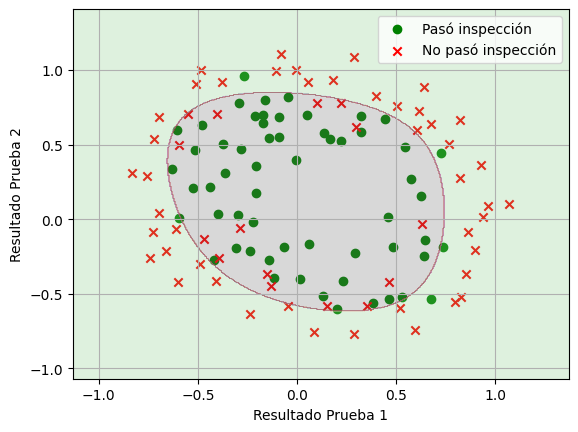

In [16]:
# d) muy paredico al c), pero cambiamos el valor del lambda 

# Definimos el parametro de regularizacion

lambda_regularizacion = 1

reg_logistica_1 = LogisticRegression(C = 1/lambda_regularizacion, penalty='l2', max_iter=10000)

# Entrenamos el nuevo modelo
reg_logistica_1.fit(X_poly, resultado_inspeccion)


# Grafico el resultado de las pruebas
plt.scatter(resultado_pruebas[resultado_inspeccion == 1][:, 0], resultado_pruebas[resultado_inspeccion == 1][:, 1], color='green', marker='o', label='Pasó inspección')
plt.scatter(resultado_pruebas[resultado_inspeccion == 0][:, 0], resultado_pruebas[resultado_inspeccion == 0][:, 1], color='red', marker='x',label='No pasó inspección')
plt.xlabel('Resultado Prueba 1')
plt.ylabel('Resultado Prueba 2')
plt.legend()
plt.grid()

# Creamos malla para la frontera
x_min, x_max = resultado_pruebas[:, 0].min() - 0.3, resultado_pruebas[:, 0].max() + 0.3
y_min, y_max = resultado_pruebas[:, 1].min() - 0.3, resultado_pruebas[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predecir sobre la malla de puntos con el nuevo modelo entrenado
prediccion_1 = reg_logistica_1.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
prediccion_1 = prediccion_1.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, prediccion_1, alpha=0.25, cmap='Accent')


#del lambda_regularizacion, reg_logistica_1, x_min, x_max, y_min, y_max, xx, yy, prediccion_1

### Ejercicio 6

![image.png](enunciados/ej6.png)

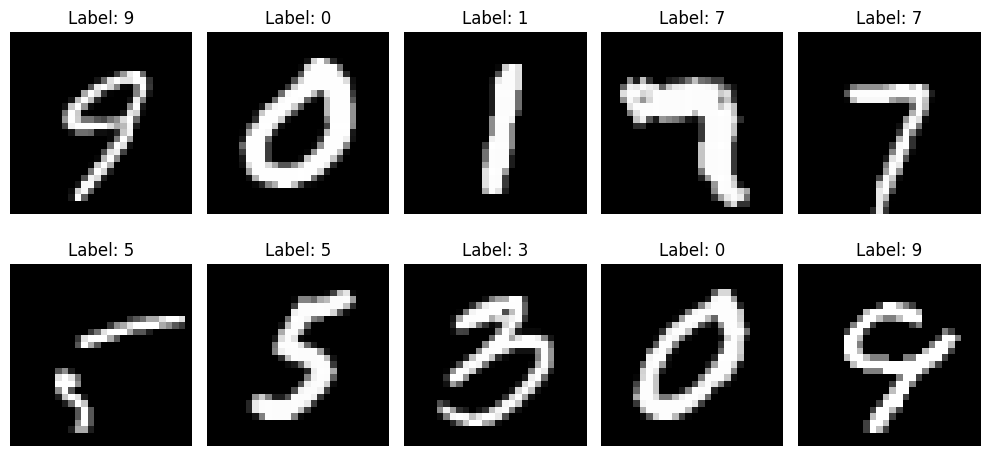

In [57]:
# a)

# Cargar la base de datos MNIST
# Cada imagen es de tamaño 28×28 píxeles y tiene un solo canal en escala de grises
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Elijo 10 indices aleatorios, que no se repitan
ran_index = np.random.choice(len(x_test), 10, replace=False)

# Guardo las imagenes y los labels (nombres)
ran_images = x_test[ran_index]
ran_labels = y_test[ran_index]

# Crear una figura para representar las imágenes
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(ran_images[i], cmap='gray')
    plt.title(f"Label: {ran_labels[i]}")
    plt.axis('off')

plt.tight_layout()

#del x_train, y_train, x_test, y_test, ran_index, ran_images, ran_labels, i


In [56]:
# b) 

x_train1 = x_train.reshape(-1, 28*28)  # Convertir de 28x28 a vector de 784
x_test1 = x_test.reshape(-1, 28*28)

# Le bajo un poco la cantidad de iteraciones para que no tarde tanto
log_reg = LogisticRegression(max_iter=200)

# Entrenar el modelo
log_reg.fit(x_train1, y_train)

# Predecir en el conjunto de entrenamiento y testeo
y_train_pred = log_reg.predict(x_train1)
y_test_pred = log_reg.predict(x_test1)

# Calcular el accuracy en el conjunto de entrenamiento y testeo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar los resultados
print(f"Accuracy de entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy de testeo: {test_accuracy:.4f}")


#del x_train1, x_test1, log_reg, y_train_pred, y_test_pred, train_accuracy, test_accuracy




C:\Users\joaqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy de entrenamiento: 0.9375
Accuracy de testeo: 0.9225


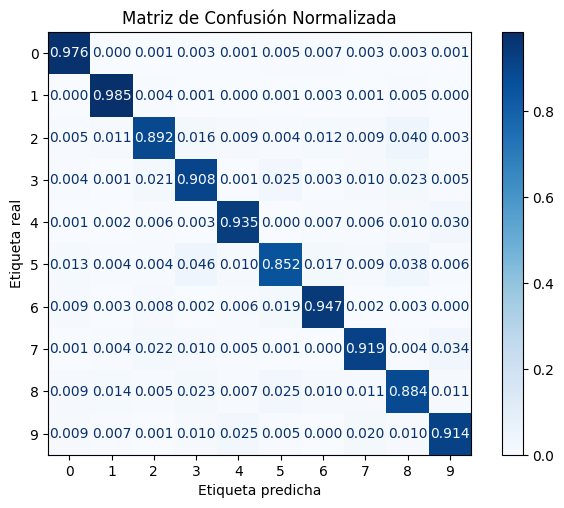

In [55]:
# c)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred, normalize='true')

# Mostrar la matriz de confusión con formato de 3 decimales
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='.3f')
plt.tight_layout(pad=0.5) #Ajusto un poco el espaciado, sino quedaba todo muy junto
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.show()

#del cm, disp


### Ejercicio 7

![image.png](enunciados/ej7.png)

In [2]:
# Cargamos los datos 

data = pd.read_csv('recursos/formantes.txt', sep='\t', header=None, names=['Formante1', 'Formante2', 'Formante3', 'Vocal'])


#del data

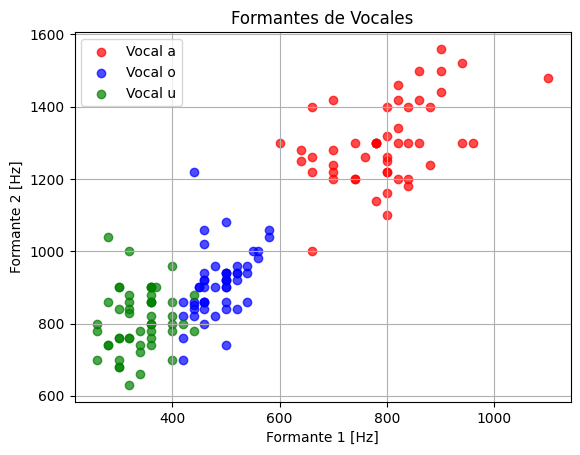

In [3]:
# a)

# Extraer las columnas relevantes
X = data[['Formante1', 'Formante2']].values
y = data['Vocal']


# Colores para cada vocal
colors = {'a':'red', 'o':'blue', 'u':'green'}

# Graficar cada vocal con un color diferente
for vocal in colors.keys():
    subset = data[data['Vocal'] == vocal]
    plt.scatter(subset['Formante1'], subset['Formante2'], c=colors[vocal], label=f'Vocal {vocal}', alpha=0.7)
plt.xlabel('Formante 1 [Hz]')
plt.ylabel('Formante 2 [Hz]')
plt.title('Formantes de Vocales')
plt.legend()
plt.grid()

#del X, y, colors, vocal, subset

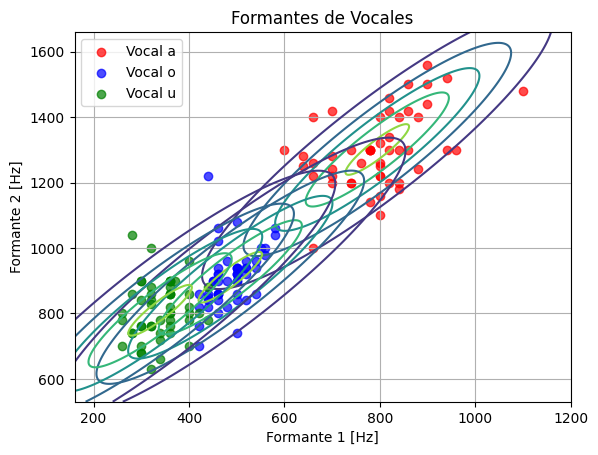

In [6]:
# b) 

# Graficar cada vocal con un color diferente
for vocal in colors.keys():
    subset = data[data['Vocal'] == vocal]
    plt.scatter(subset['Formante1'], subset['Formante2'], c=colors[vocal], label=f'Vocal {vocal}', alpha=0.7)
plt.xlabel('Formante 1 [Hz]')
plt.ylabel('Formante 2 [Hz]')
plt.title('Formantes de Vocales')
plt.legend()
plt.grid()


#Entrenamos el modelo

lda = LDA()
lda.fit(X, y)

medias = lda.means_

# Con esta covarianza me da raro el grafico, la calculo de otra manera
covarianza = np.cov(X.T)

#Dk = cantidad de datos de la clase k
Dk = np.array([len(data['Vocal']=='a'), len(data['Vocal']=='o'), len(data['Vocal']=='u')]).reshape(-1, 1)
#Datos totales
cant_datos = len(data)
cant_vocales = Dk.shape[0]


#covarianza_a = np.cov(data.loc[data['Vocal']=='a'].drop(2, axis=1))

#covarianza = 


#Creamos la malla para graficar

x_min, x_max = X[:, 0].min() - 100, X[:, 0].max() + 100
y_min, y_max = X[:, 1].min() - 100, X[:, 1].max() + 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))


norm_multivar_a = multivariate_normal(medias[0], covarianza)
dens_norm_multivar_a = norm_multivar_a.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_a, levels = 5)

norm_multivar_o = multivariate_normal(medias[1], covarianza)
dens_norm_multivar_o = norm_multivar_o.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_o, levels = 5)

norm_multivar_u = multivariate_normal(medias[2], covarianza)
dens_norm_multivar_u = norm_multivar_u.pdf(np.dstack((xx, yy)))
plt.contour(xx, yy, dens_norm_multivar_u, levels = 5)



#del lda, medias, covarianza, x_min, x_max, y_min, y_max, xx, yy
